# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_log = []
    E_log = []

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T + Q

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E
        x_log.append(x)
        E_log.append(E)

        print(f"x= \n{x}")
        print(f"E= \n{E}")

    return k_log, x_log, E_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [ ]:
np.eye(4)[0:2]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
dt = 0.1
V_COV = 1_000
X_V_Var = 0.1
Mesurment_Var = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = X_V_Var * np.eye(4) 
E[2][3], E[3][2] = V_COV, V_COV
# next state function: 4D
F = np.eye(4)
F[0][2], F[1][3] = dt, dt

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.eye(4)[0:2]

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = Mesurment_Var * np.eye(2)

# 4D identity matrix
I = np.eye(4)

Q = np.zeros(4)
print("E:\n", E, "\nF:\n", F, "\nH:\n", H, "\nR:\n", R, "\nI:\n", I, "\nQ:\n", Q)

E:
 [[1.e-01 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-01 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-01 1.e+03]
 [0.e+00 0.e+00 1.e+03 1.e-01]] 
F:
 [[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]] 
H:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]] 
R:
 [[0.1 0. ]
 [0.  0.1]] 
I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
Q:
 [0. 0. 0. 0.]


## First experiment

In [ ]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  5.02120957]
 [  9.98957369]
 [ 10.42419138]
 [-21.20852625]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[  6.01052577]
 [  7.99494632]
 [ 10.10525774]
 [-21.05053681]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[  7.00630633]
 [  5.99698676]
 [ 10.04204219]
 [-21.02008829]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [ ]:
def vis_x(x_log, measurements, dt):
  time = [dt * t for t in range(1, len(x_log) + 1)]

  x_hat = [x[0] for x in x_log]
  y_hat = [x[1] for x in x_log]
  x_msm = [x[0] for x in measurements]
  y_msm = [x[1] for x in measurements]

  Vx_hat = [x[2] for x in x_log]
  Vy_hat = [x[3] for x in x_log]

  plt.figure(figsize=(18, 14))
  plt.subplot(221)
  plt.plot(time, x_msm, "bo-", label="x_measurements")
  plt.plot(time, x_hat, "gx--", label="x_hat")
  plt.xlabel("time")
  plt.legend()

  plt.subplot(222)
  plt.plot(time, y_msm, "bo-", label="y_measurements")
  plt.plot(time, y_hat, "gx--", label="y_hat")
  plt.xlabel("time")
  plt.legend()

  plt.subplot(223)
  plt.plot(time, Vx_hat, "gx--", label="Vx_hat")
  plt.xlabel("time")
  plt.legend()

  plt.subplot(224)
  plt.plot(time, Vy_hat, "gx--", label="Vy_hat")
  plt.xlabel("time")
  plt.legend()


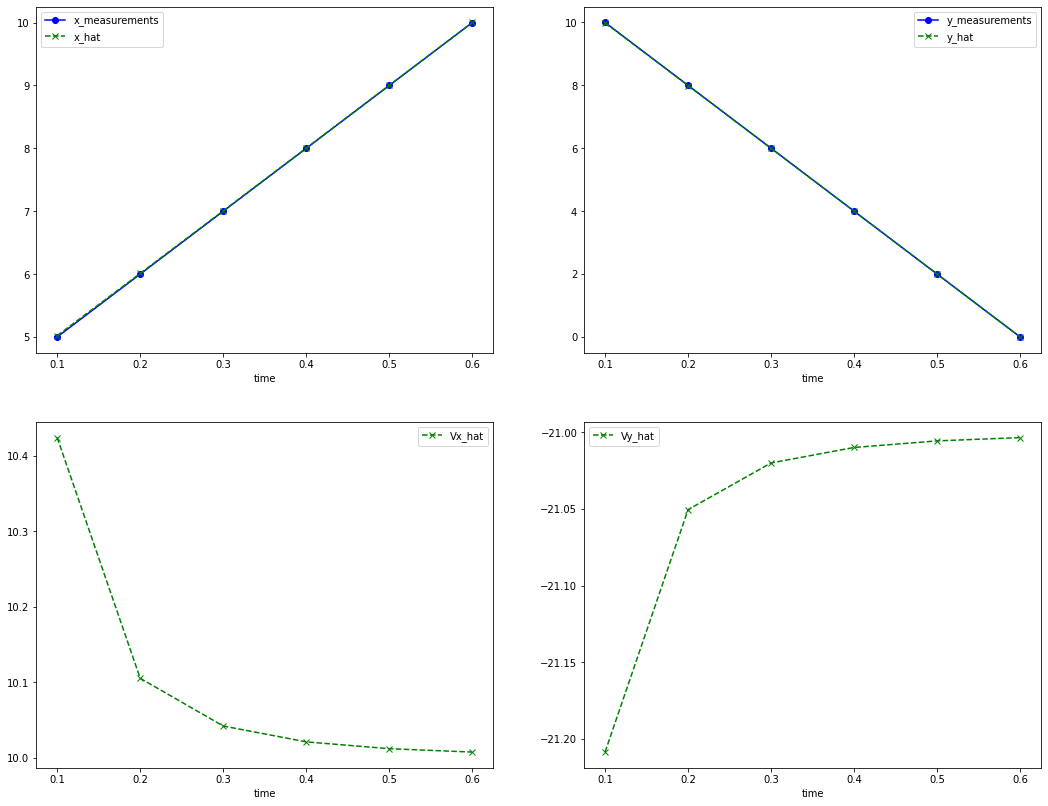

In [ ]:
vis_x(x_log, measurements, dt)

In [ ]:
# YOUR CODE HERE

Visualize the components of the $ K $ matrix below

In [ ]:
def vis_k(k_log, dt):

  time = [dt * t for t in range(1, len(k_log) + 1)]

  plt.figure(figsize=(18, 14))
  plt.subplot(221)
  plt.plot(time, [k[0][0] for k in k_log], "bo-", label="k_11")
  plt.plot(time, [k[0][1] for k in k_log], "gx--", label="k_12")
  plt.xlabel("time")
  plt.legend()

  plt.subplot(222)
  plt.plot(time, [k[1][0] for k in k_log], "bo-", label="k_21")
  plt.plot(time, [k[1][1] for k in k_log], "gx--", label="k_22")
  plt.xlabel("time")
  plt.legend()

  plt.subplot(223)
  plt.plot(time, [k[2][0] for k in k_log], "bo-", label="k_31")
  plt.plot(time, [k[2][1] for k in k_log], "gx--", label="k_32")
  plt.xlabel("time")
  plt.legend()

  plt.subplot(224)
  plt.plot(time, [k[3][0] for k in k_log], "bo-", label="k_41")
  plt.plot(time, [k[3][1] for k in k_log], "gx--", label="k_42")
  plt.xlabel("time")
  plt.legend()

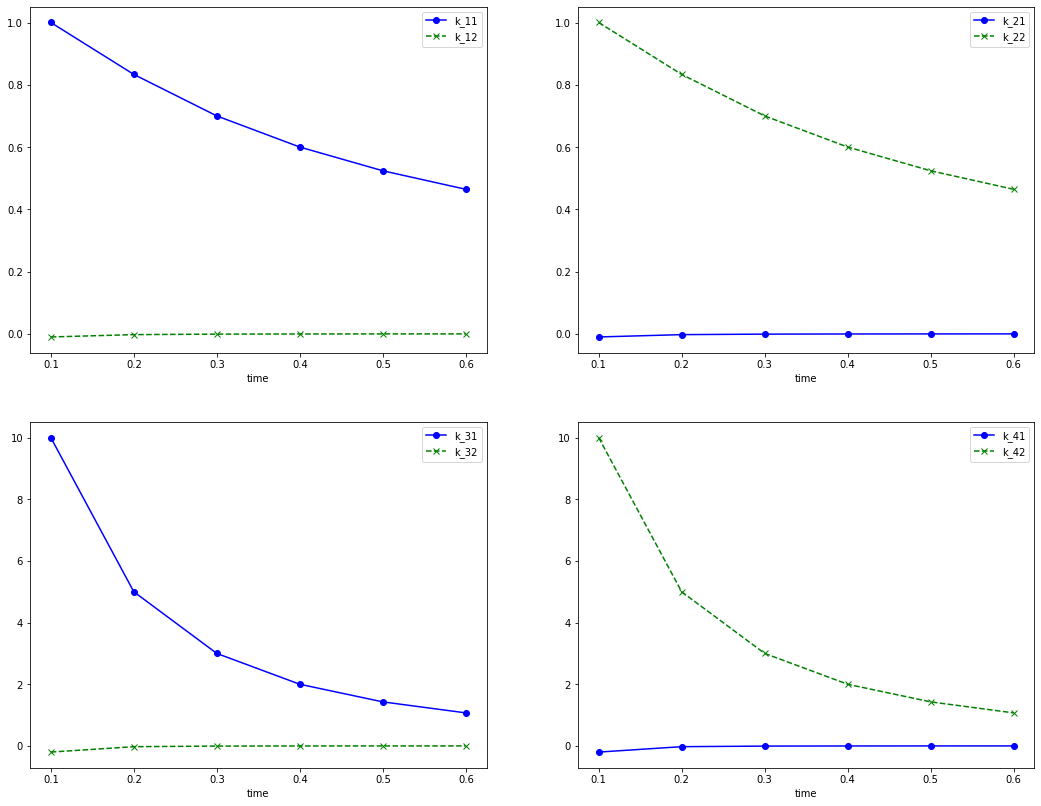

In [ ]:
vis_k(k_log, dt)

In [ ]:
# YOUR CODE HERE

## Second experiment

In [ ]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  1.04202198]
 [  3.94915536]
 [ 50.84043955]
 [-42.01689283]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[ 6.02062804e+00]
 [-2.51052030e-02]
 [ 5.02062804e+01]
 [-4.12510520e+01]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[ 11.01233155]
 [ -4.0150259 ]
 [ 50.08221036]
 [-41.10017264]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

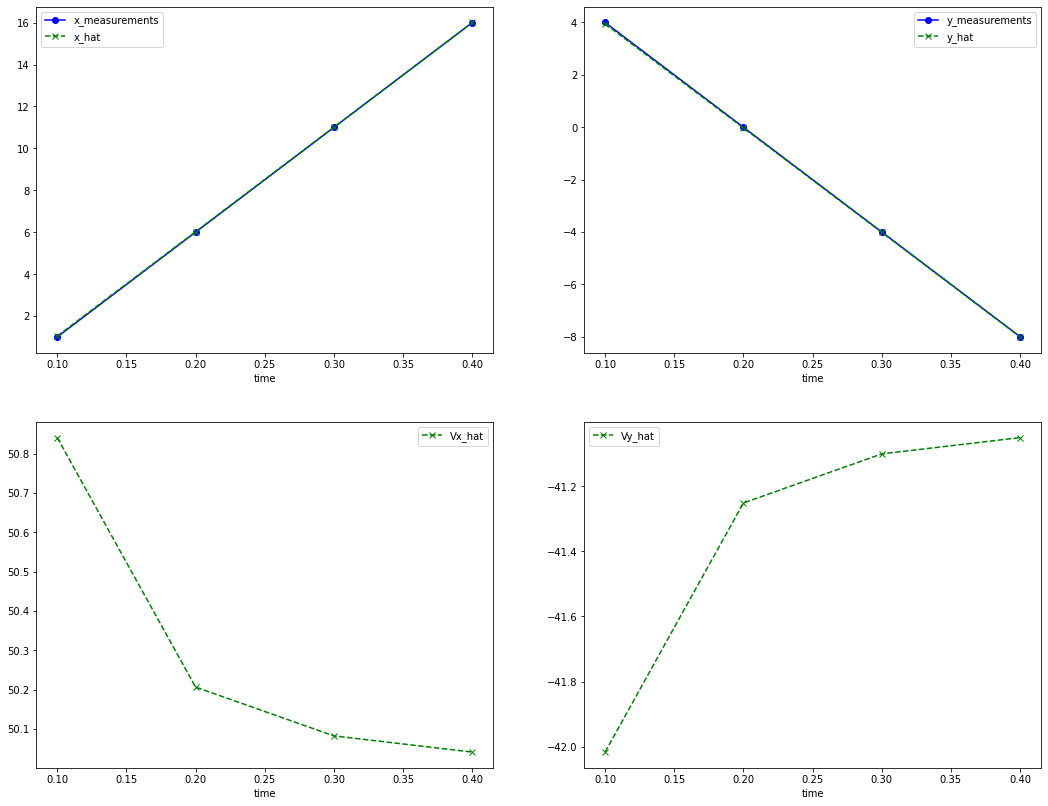

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

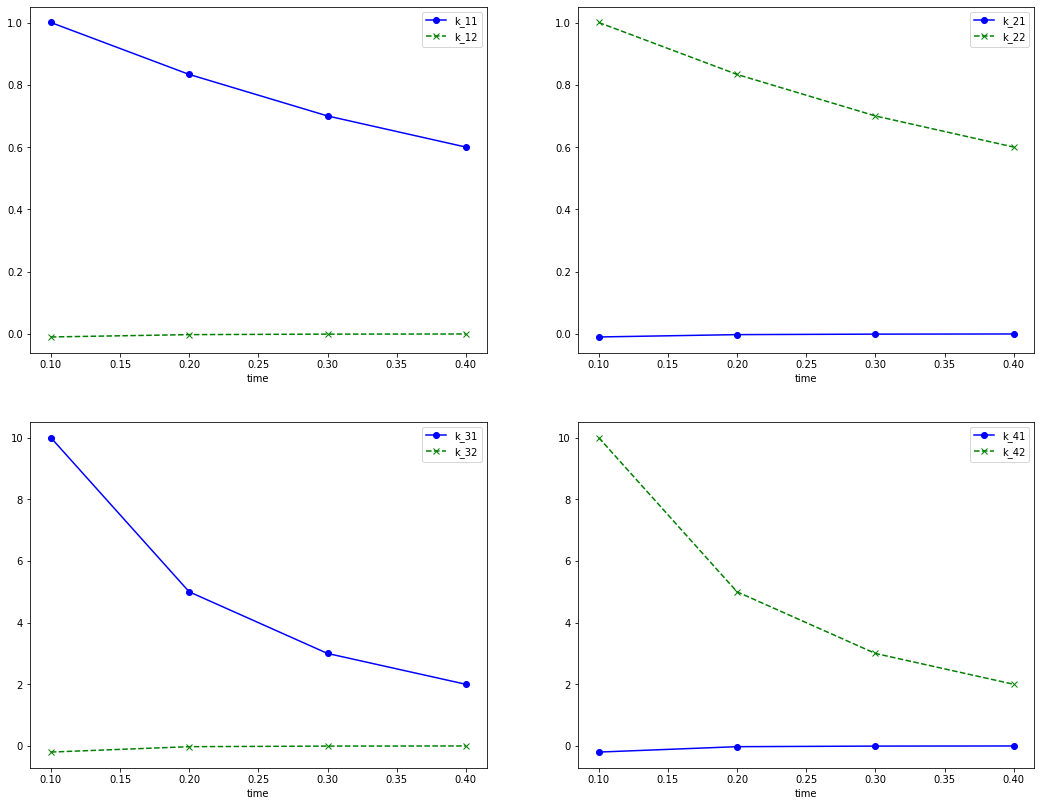

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

## Third Experiment

In [ ]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  1.02100849]
 [ 16.99957773]
 [  0.42016975]
 [-21.00844541]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[  1.01050027]
 [ 14.99994645]
 [  0.10500273]
 [-21.00053551]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[  1.00630003]
 [ 12.99998677]
 [  0.04200019]
 [-21.0000882 ]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

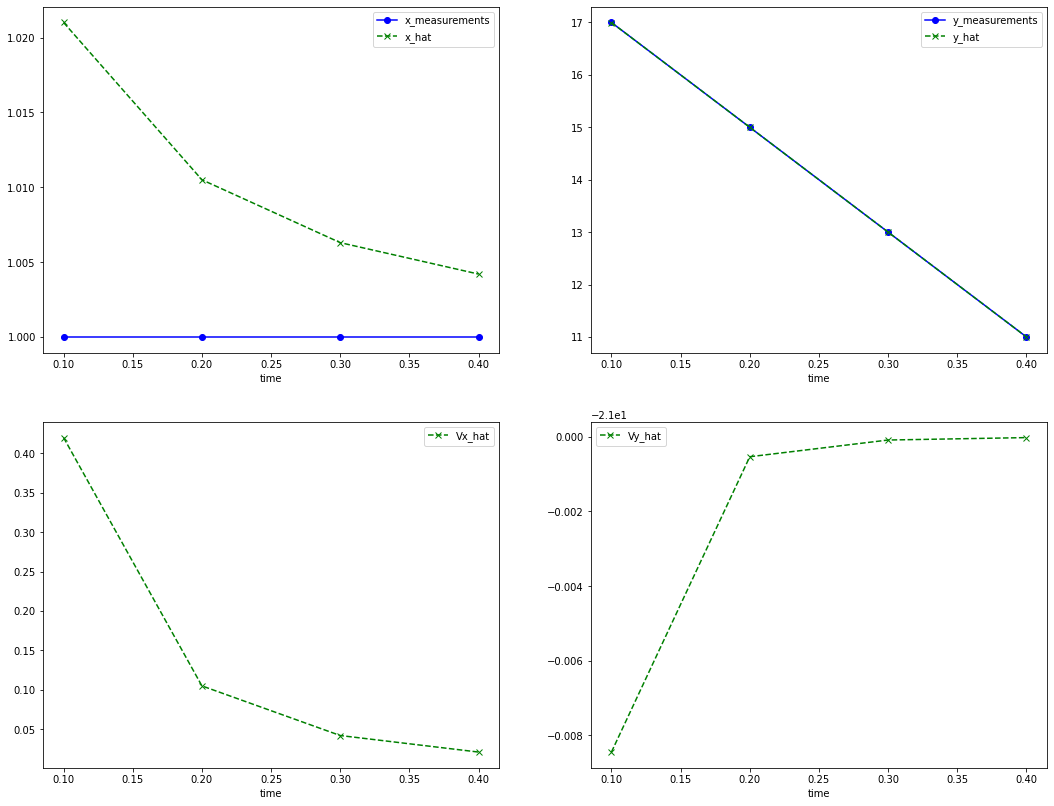

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

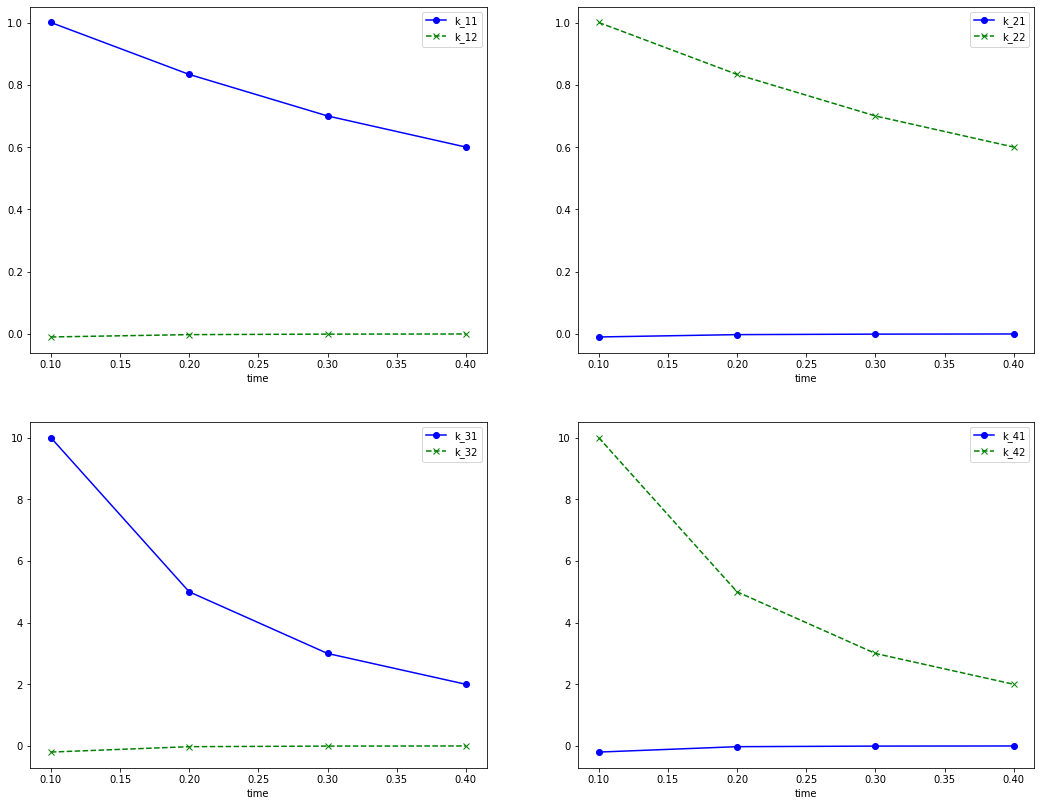

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

##Experiment 4

In [ ]:
VELOCITY = 100
STEPS = 100
dt = 0.1

initial_xy = [1.0, 1.0]
measurements = [[1.0, 1.0]]

for _ in range(STEPS):
  measurements.append([measurements[-1][0], measurements[-1][1] + VELOCITY * dt])


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[ 1.0010004 ]
 [ 0.99997989]
 [ 0.02000808]
 [-1.00040216]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[ 0.97549936]
 [ 9.33345829]
 [-0.24500637]
 [49.00124953]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[ 0.97929991]
 [19.00004347]
 [-0.13800061]
 [69.0002898 ]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001764e-03  2.0

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

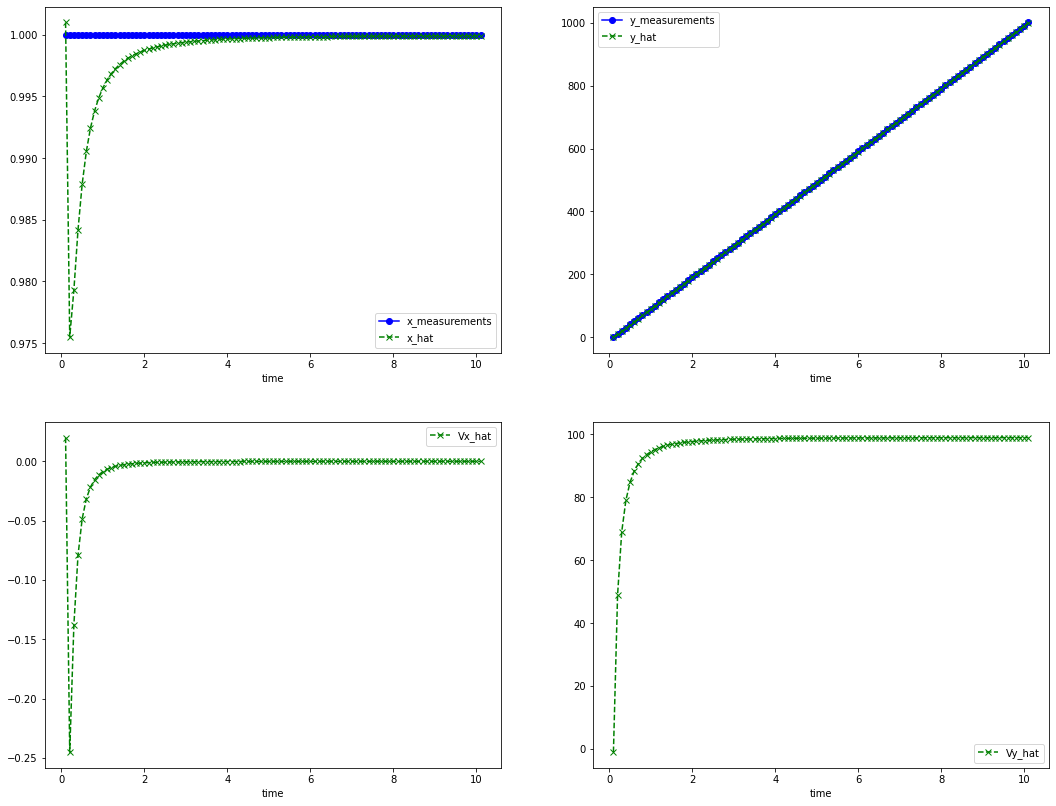

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

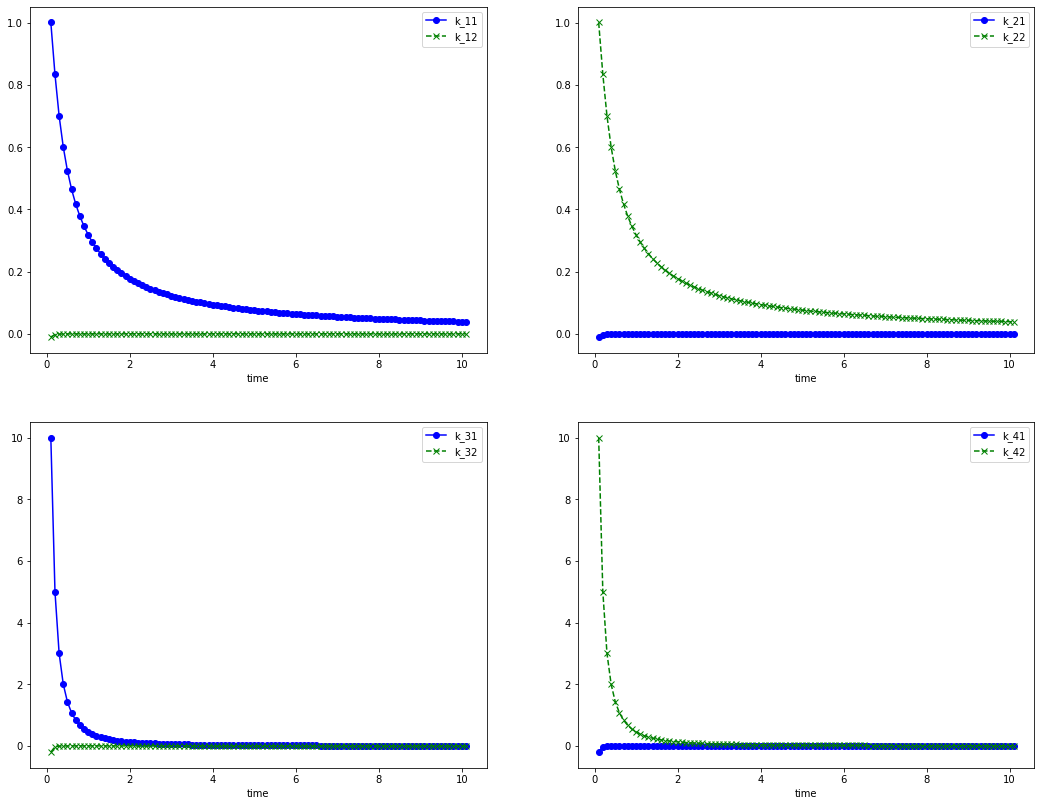

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

##Experiment 5

In [ ]:
VELOCITY = 100
STEPS = 100
dt = 0.1

initial_xy = [1.0, 1.0]
measurements = [[1.0, 1.0]]

for _ in range(STEPS):
  measurements.append([measurements[-1][0], measurements[-1][1] + (VELOCITY + VELOCITY * np.random.randn()) * dt])


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[ 1.0010004 ]
 [ 0.99997989]
 [ 0.02000808]
 [-1.00040216]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[ 0.97112386]
 [10.79194486]
 [-0.28876144]
 [57.75225822]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[  0.96696669]
 [ 28.88422563]
 [ -0.22022209]
 [110.11101992]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001764e-03 

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

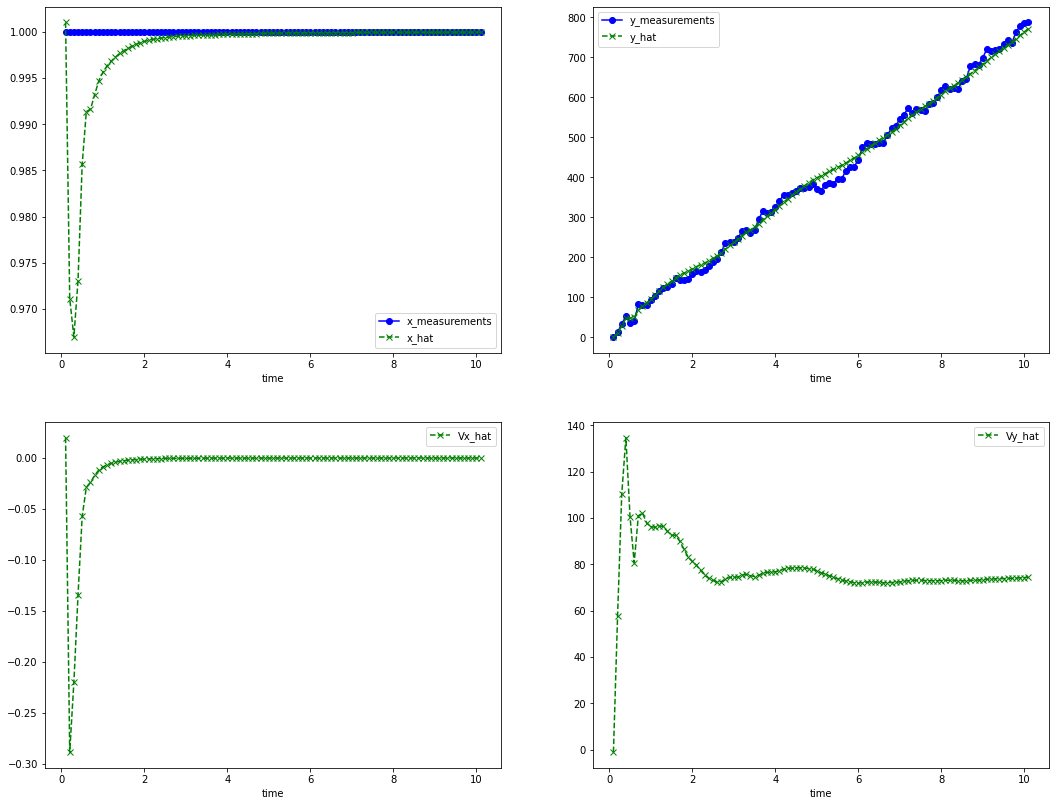

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

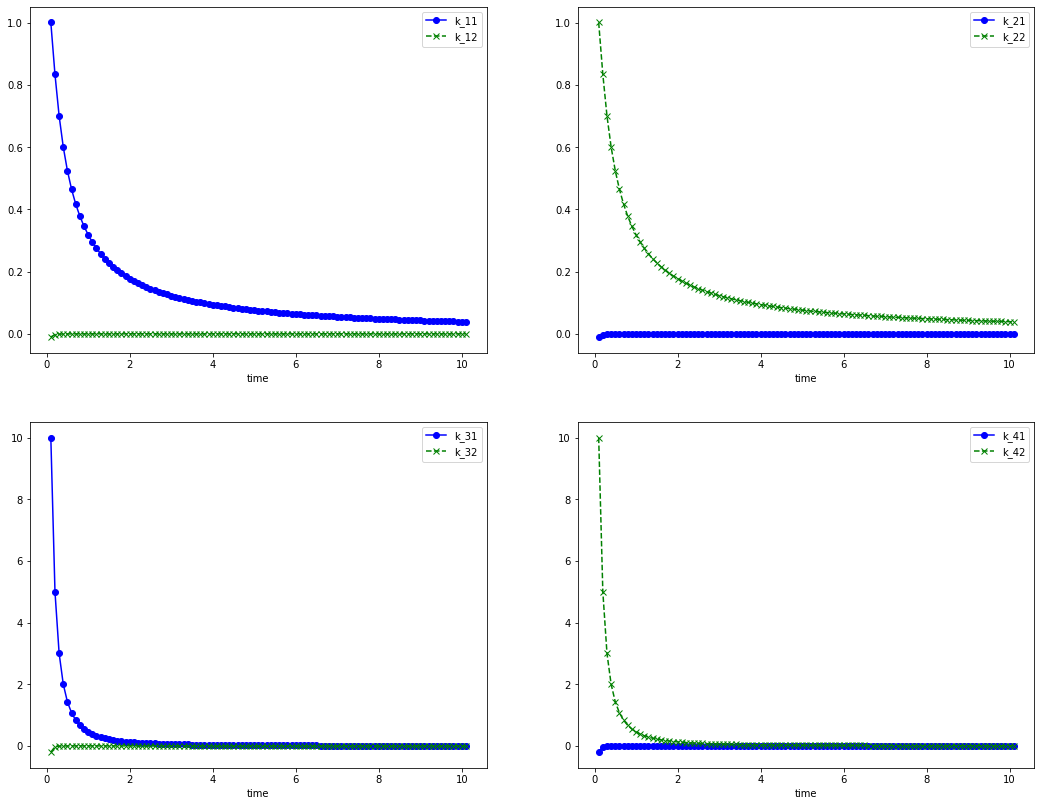

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

##Experiment 6

In [ ]:
#VELOCITY = 10
STEPS = 100
dt = 0.1

initial_xy = [1.0, 5.0]
measurements = [[1.0, 1.0]]

for i in range(STEPS):
  measurements.append([measurements[-1][0], measurements[-1][1] + np.sin(i * dt)])


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  1.04101657]
 [  0.99917557]
 [  0.82033142]
 [-41.01648866]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[  1.01050027]
 [  0.33327978]
 [  0.10500273]
 [-21.00053551]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[  1.00381017]
 [  0.26987539]
 [  0.02540111]
 [-12.70055309]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

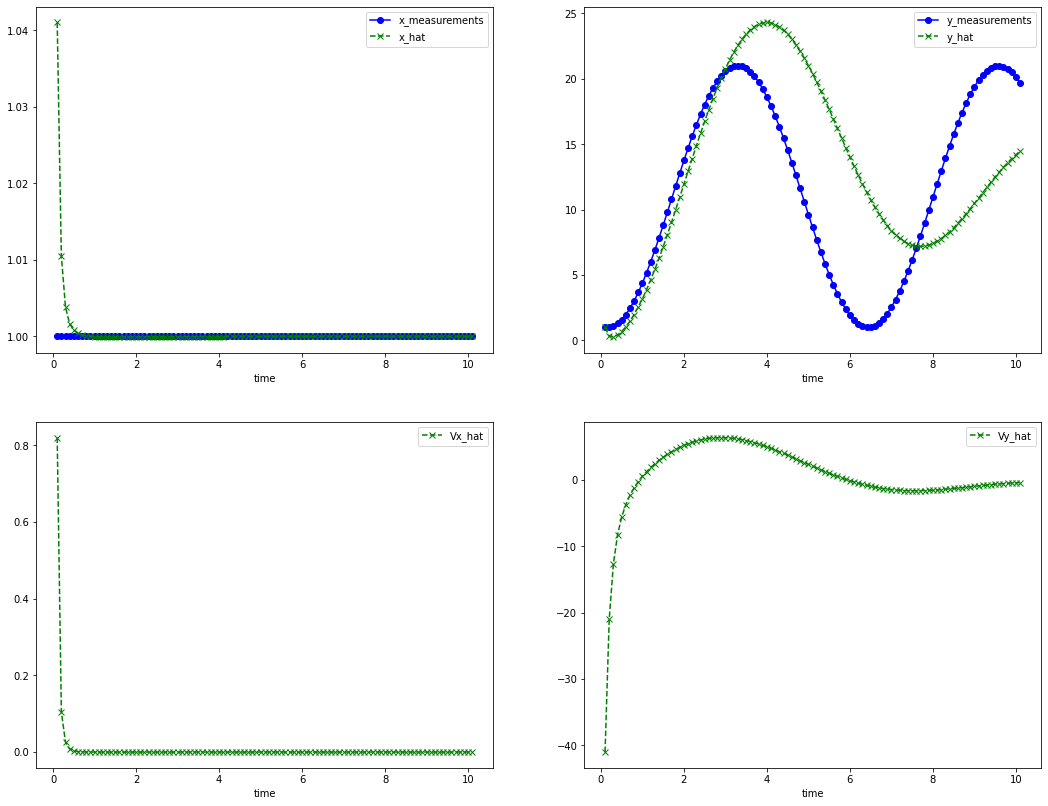

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

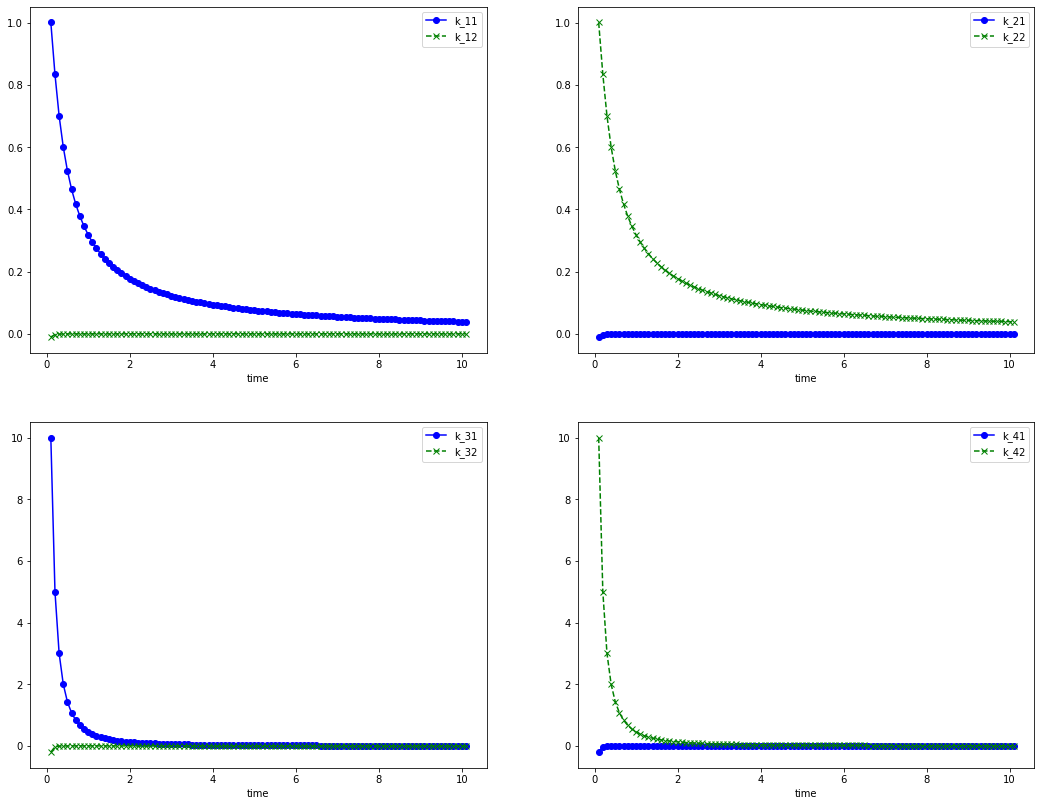

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

##Experiment 6

In [ ]:
VELOCITY = 10
STEPS = 100
dt = 0.1

initial_xy = [1.0, 5.0]
measurements = [[1.0, 1.0]]

for i in range(STEPS):
  measurements.append([measurements[-1][0], measurements[-1][1] + VELOCITY * dt + np.sin(i * dt)])


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  1.04101657]
 [  0.99917557]
 [  0.82033142]
 [-41.01648866]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[  1.00800021]
 [  1.16662587]
 [  0.08000208]
 [-16.00040801]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[ 1.00171016]
 [ 2.0698798 ]
 [ 0.01140105]
 [-5.70052369]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001764e

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

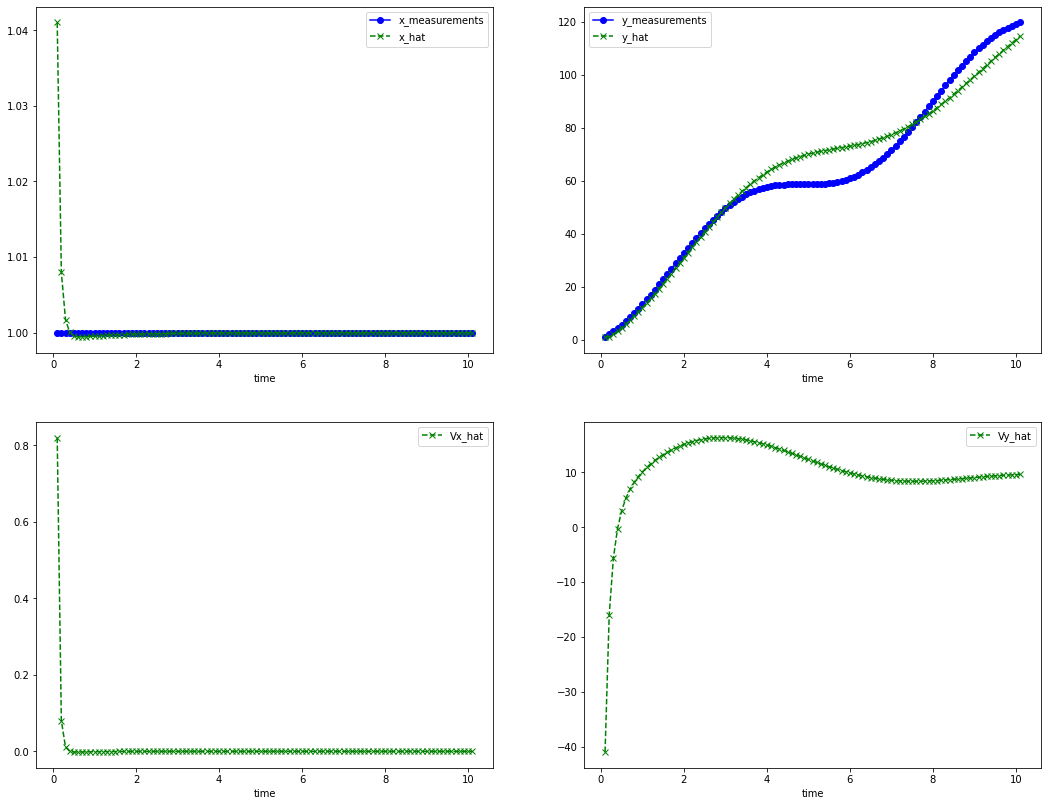

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

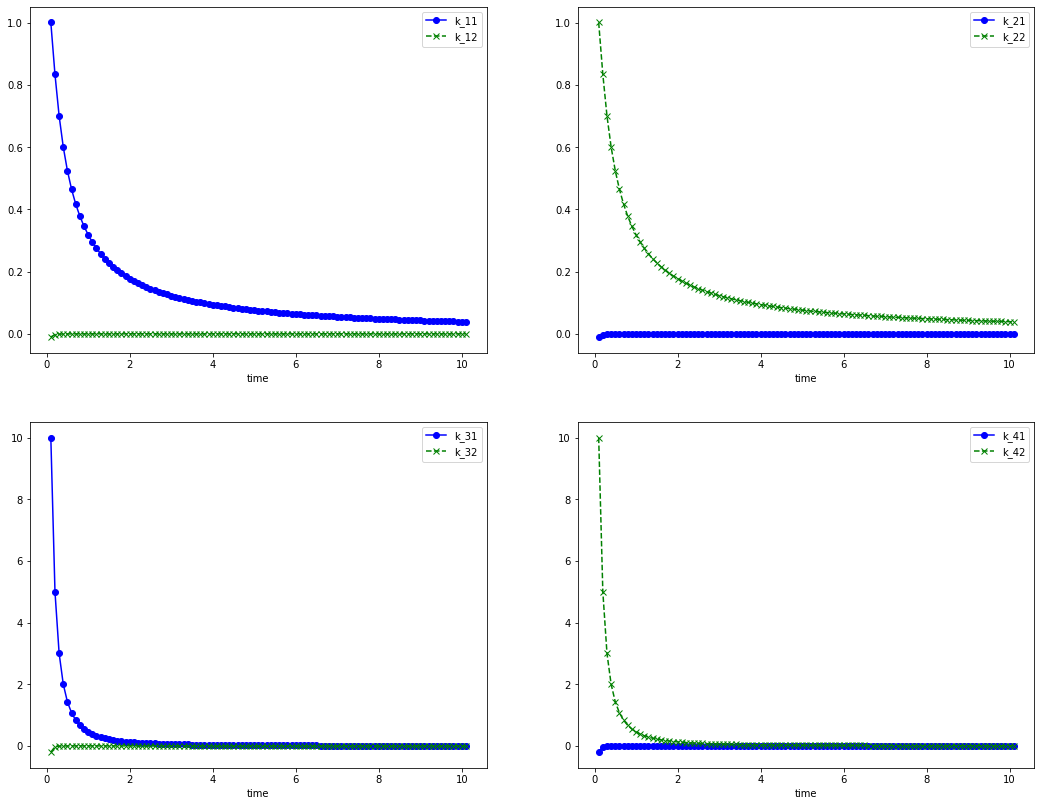

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

##Experiment 7

In [ ]:
VELOCITY = 10
STEPS = 100
dt = 0.1

initial_xy = [1.0, 5.0]
measurements = [[1.0, 1.0]]

for i in range(STEPS):
  measurements.append([measurements[-1][0], measurements[-1][1] + (VELOCITY + VELOCITY * np.random.randn()) * dt + np.sin(i * dt)])


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  1.04101657]
 [  0.99917557]
 [  0.82033142]
 [-41.01648866]]
E= 
[[ 1.00020108e-01 -1.00040417e-03  1.00040216e+00 -2.00080835e-02]
 [-1.00040417e-03  1.00020108e-01 -2.00080835e-02  1.00040216e+00]
 [ 1.00040216e+00 -2.00080835e-02  2.00080432e+01 -4.00161669e-01]
 [-2.00080835e-02  1.00040216e+00 -4.00161669e-01  2.00080432e+01]]
x= 
[[  1.00635825]
 [  1.71394082]
 [  0.06358246]
 [-12.71648479]]
E= 
[[ 8.33346084e-02 -2.50006503e-04  5.00012750e-01 -2.50006503e-03]
 [-2.50006503e-04  8.33346084e-02 -2.50006503e-03  5.00012750e-01]
 [ 5.00012750e-01 -2.50006503e-03  5.00012750e+00 -2.50006503e-02]
 [-2.50006503e-03  5.00012750e-01 -2.50006503e-02  5.00012750e+00]]
x= 
[[ 1.00134578]
 [ 2.46274819]
 [ 0.00897184]
 [-4.48592014]]
E= 
[[ 7.00001890e-02 -9.00003969e-05  3.00001260e-01 -6.00002646e-04]
 [-9.00003969e-05  7.00001890e-02 -6.00002646e-04  3.00001260e-01]
 [ 3.00001260e-01 -6.00002646e-04  2.00000840e+00 -4.00001764e-03]
 [-6.00002646e-04  3.00001260e-01 -4.00001764e

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

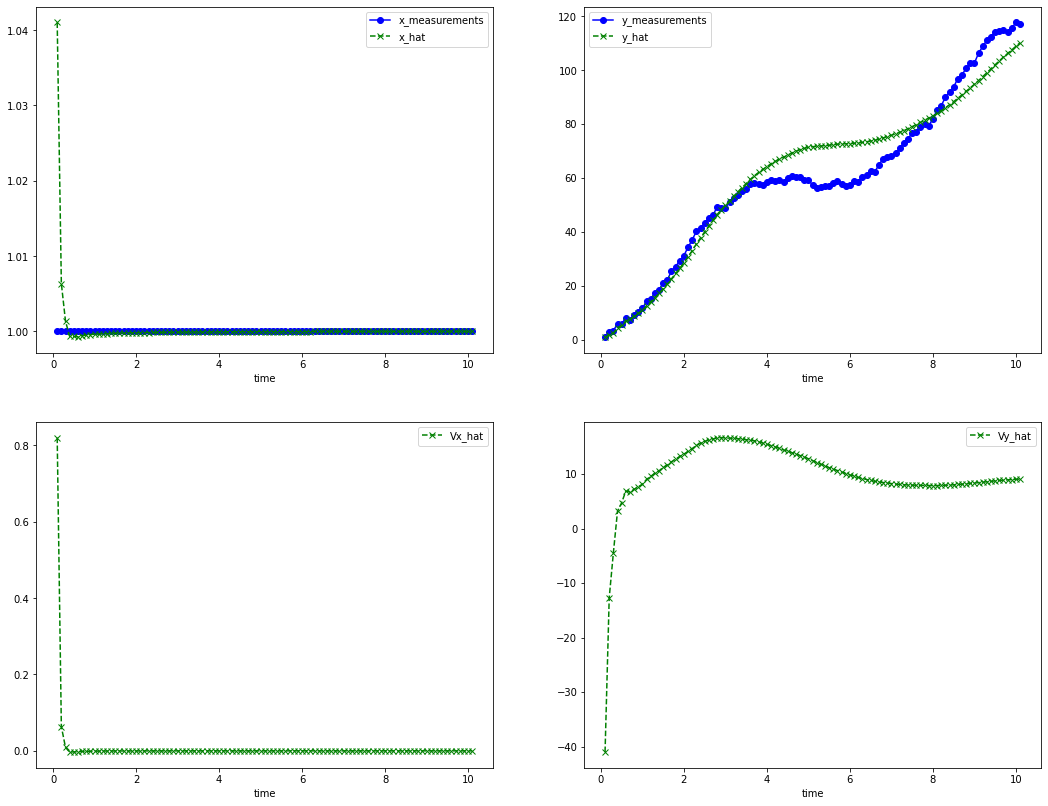

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

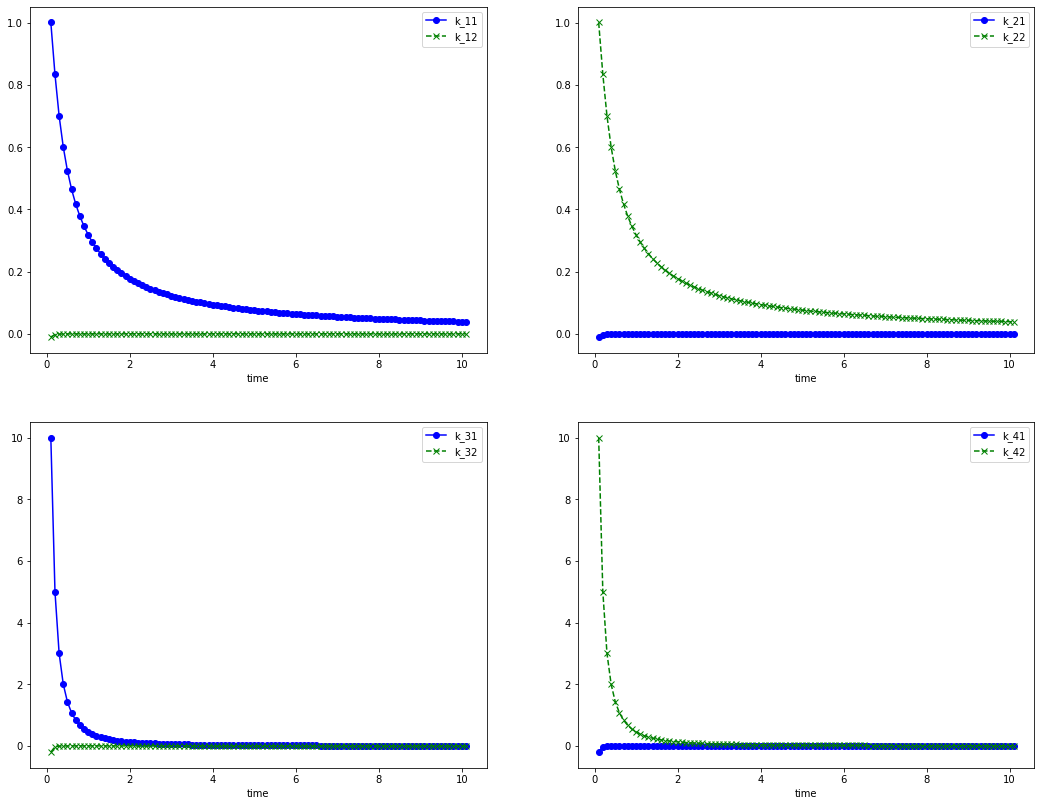

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

In [ ]:
k_log[50]

array([[ 7.47460087e-02, -4.73962606e-08],
       [-4.73962605e-08,  7.47460087e-02],
       [ 2.17706821e-02, -1.85867688e-08],
       [-1.85867688e-08,  2.17706821e-02]])

##Experiment 8

In [ ]:
Q = 0.01 * X_V_Var * np.eye(4)
VELOCITY = 10
STEPS = 100
dt = 0.1

initial_xy = [1.0, 5.0]
measurements = [[1.0, 1.0]]

for i in range(STEPS):
  measurements.append([measurements[-1][0], measurements[-1][1] + (VELOCITY + VELOCITY * np.random.randn()) * dt + np.sin(i * dt)])


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [ ]:
k_log, x_log, E_log = kalman_filter(x, E)

x= 
[[  1.04101674]
 [  0.99917146]
 [  0.8244364 ]
 [-41.01665362]]
E= 
[[ 1.00020208e-01 -1.00040821e-03  1.00040619e+00 -2.01082050e-02]
 [-1.00040821e-03  1.00020208e-01 -2.01082050e-02  1.00040619e+00]
 [ 1.00040619e+00 -2.01082050e-02  2.01091643e+01 -4.04174920e-01]
 [-2.01082050e-02  1.00040619e+00 -4.04174920e-01  2.01091643e+01]]
x= 
[[ 1.00484957]
 [ 2.22037149]
 [ 0.04897904]
 [-9.69825549]]
E= 
[[ 8.33902678e-02 -2.49998326e-04  5.00021309e-01 -2.52490003e-03]
 [-2.49998326e-04  8.33902678e-02 -2.52490003e-03  5.00021309e-01]
 [ 5.00021309e-01 -2.52490003e-03  5.05138133e+00 -2.55006515e-02]
 [-2.52490003e-03  5.00021309e-01 -2.55006515e-02  5.05138133e+00]]
x= 
[[ 1.00025849e+00]
 [ 3.41632421e+00]
 [ 1.75174646e-03]
 [-8.58905776e-01]]
E= 
[[ 7.01408127e-02 -9.00465079e-05  3.00127871e-01 -6.10232384e-04]
 [-9.00465079e-05  7.01408127e-02 -6.10232384e-04  3.00127871e-01]
 [ 3.00127871e-01 -6.10232384e-04  2.03558673e+00 -4.13545812e-03]
 [-6.10232384e-04  3.00127871e-01 

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

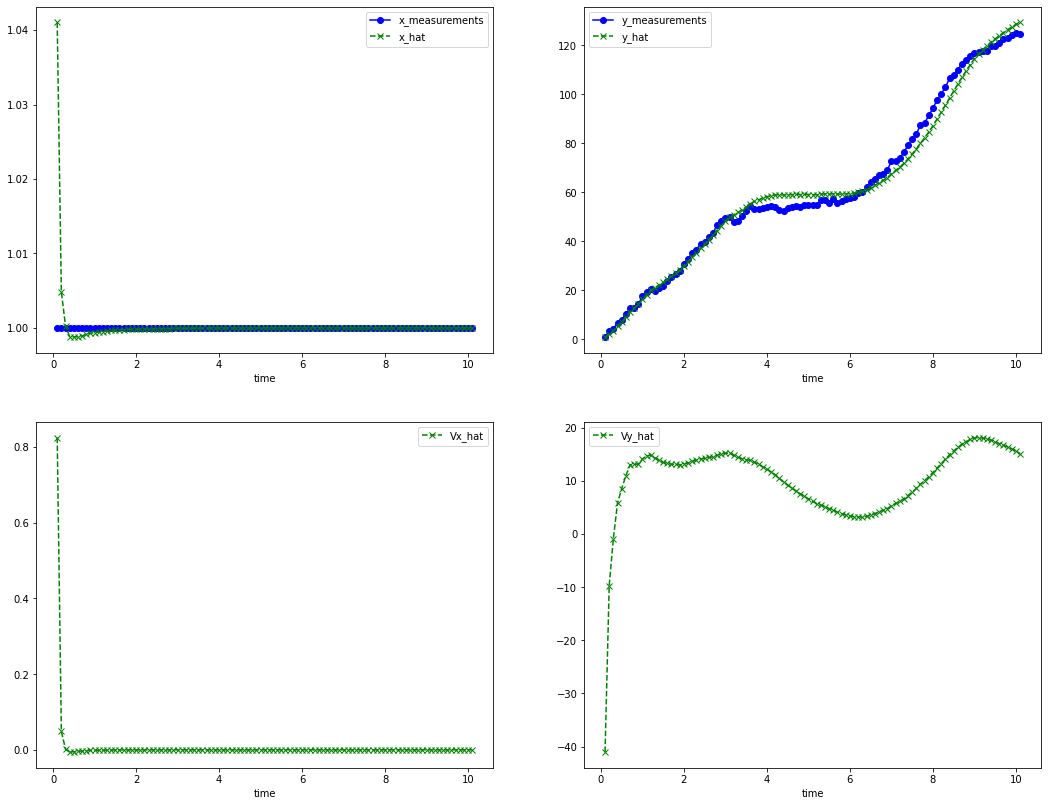

In [ ]:
# YOUR CODE HERE
vis_x(x_log, measurements, dt)

Visualize the components of the $ K $ matrix below

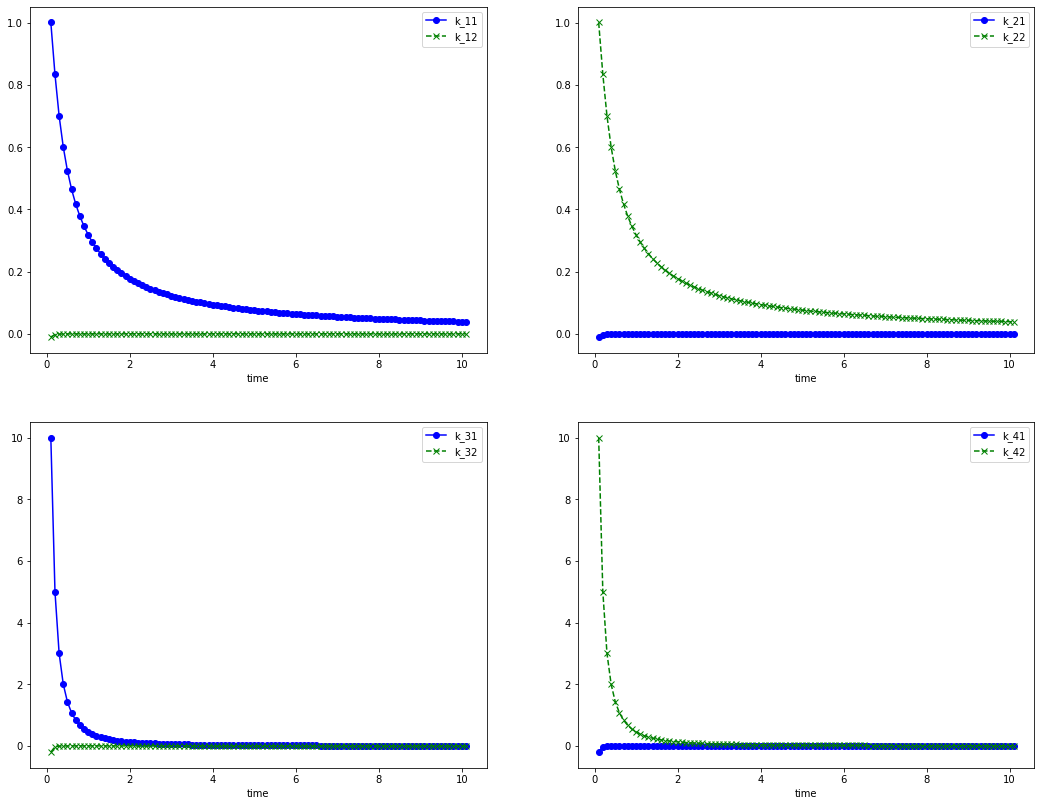

In [ ]:
# YOUR CODE HERE
vis_k(k_log, dt)

In [ ]:
k_log[50]

array([[ 1.59203836e-01, -1.58194618e-09],
       [-1.58194619e-09,  1.59203836e-01],
       [ 9.17811588e-02, -6.53734466e-11],
       [-6.53734474e-11,  9.17811588e-02]])

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

По сути значения в матрице K характеризуют, насколько мы уверены в предсказании. Т.е. чем больше значение компонент в матрице K, тем сильнее мы ориентируемся на данные полученные с сенсоров. 

k_11 В начале принимает значение = 1 (т.к. координата x зависит от координаты x) и затем постепенно убывает до 0, т.к. в фильтре калмана мы с каждым шагом становимся уверенне в предсказание и у нас к матрице E не добаляется матрица Q (Эксперименты 1-7).
Это приводит к проблеме запаздывания при нелинейном движении. 


В эксперименте 8 добавил матрицу Q, что исправило проблему запаздывания

k_12 = 0 т.к. координата x не зависит от y

k_21 k_22 аналогично

k_31 уменьшается от 10 до 0, т.к Vx зависит от x и dt = 0.1
k_32 равно 0, т.к. Vx не зависит от y 

k_41 k_42 аналогично

Самостоятельная работа с фильтром Каламана.

Сгененрировал зашумленные данные с сенсоров (взяв "реальные" данные и добавив к ним шум). На основание данных полученных с сенсора и предсказанию текущей позиции по предыдущей с использованием фильтра Калмана определил координату x. 

Position and Velocity Visualisation


In [ ]:
X_START = 1
STEPS = 1000
v_real = [(1 + 0.2 * np.sin(0.02 * x)) * 0.001 * x + np.sin(0.003 * x) for x in range(STEPS)]
x_real = [X_START]
for i in range(1, STEPS):
  x_real.append(x_real[i - 1] + 0.01 * v_real[i])

Text(0.5, 1.0, 'v_real')

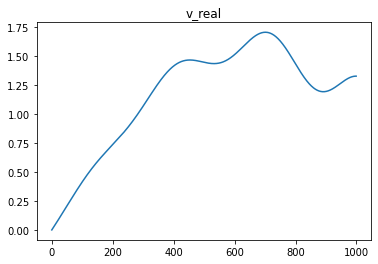

In [ ]:
plt.plot(v_real)
plt.title("v_real")


Text(0.5, 1.0, 'x_real')

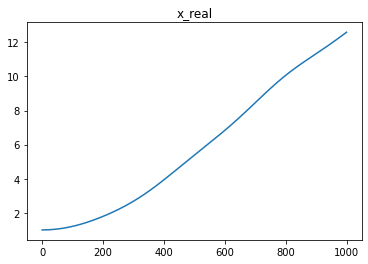

In [ ]:
plt.plot(x_real)
plt.title("x_real")

Text(0, 0.5, 'x_real')

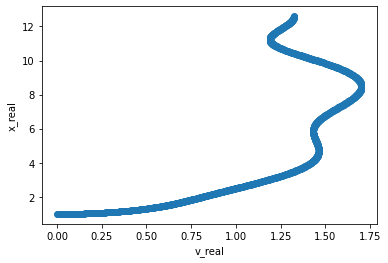

In [ ]:
plt.scatter(v_real, x_real)
plt.xlabel("v_real")
plt.ylabel("x_real")


Text(0, 0.5, 'x_noise')

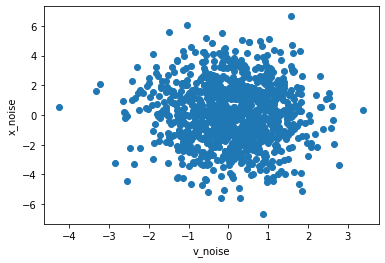

In [ ]:
v_noise = 1 * np.random.randn(len(v_real))
x_noise = 2 * np.random.randn(len(x_real))

plt.scatter(v_noise, x_noise)
plt.xlabel("v_noise")
plt.ylabel("x_noise")


Text(0, 0.5, 'x_sensor')

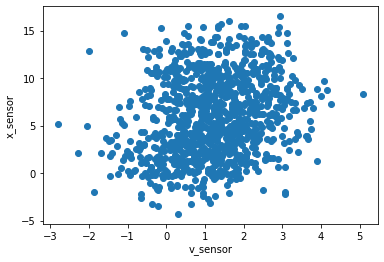

In [ ]:
v_sensor = np.array(v_real) + v_noise
x_sensor = np.array(x_real) + x_noise

plt.scatter(v_sensor, x_sensor)
plt.xlabel("v_sensor")
plt.ylabel("x_sensor")

In [ ]:
v_noise_for_position = 1 * np.random.randn(1_000)
x_noise_for_position = 2 * np.random.randn(1_000)

Text(0, 0.5, 'x')

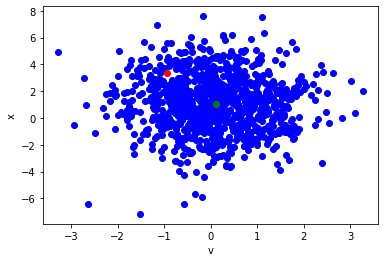

In [ ]:
# 25 position
v_position_25 = v_noise_for_position + v_real[25] 
x_position_25 = x_noise_for_position + x_real[25] 
plt.scatter(v_position_25, x_position_25, c='b')
plt.scatter(v_real[25], x_real[25], c='g')
plt.scatter(v_sensor[25], x_sensor[25], c='r')
plt.xlabel("v")
plt.ylabel("x")

In [ ]:
# Calman Filter
#  x_real.append(x_real[i - 1] + 0.01 * v_real[i])
# sigma ** 2 is unknown

TIME_STEP = 0.01
sigma_v = 1
sigma_x = 2

In [ ]:
sigma_est = sigma_x
x_kalman = [x_sensor[0]]  
for i in range(1, len(x_sensor)):
  #print(sigma_est)
  x_predict = x_kalman[i - 1] + TIME_STEP * v_sensor[i]
  sigma_est = (sigma_est ** 2 + (TIME_STEP * sigma_v) ** 2) ** 0.5
  #print(sigma_est)
  x_predict = ((sigma_x ** 2) / (sigma_est ** 2 + sigma_x ** 2)) * x_predict + ((sigma_est ** 2) / (sigma_est ** 2 + sigma_x ** 2)) * x_sensor[i]
  sigma_est = ((sigma_est ** 2 * sigma_x ** 2) / (sigma_est ** 2 + sigma_x ** 2)) ** 0.5
  #print(sigma_est)
  x_kalman.append(x_predict)
  # if (i + 1) % 5 == 0:
  #   break


Text(0.5, 1.0, 'v_sensor')

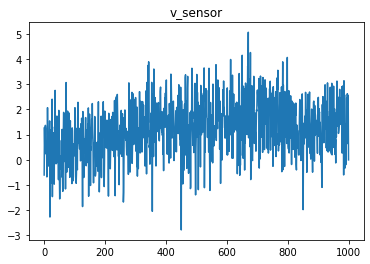

In [ ]:
plt.plot(v_sensor)
plt.title("v_sensor")


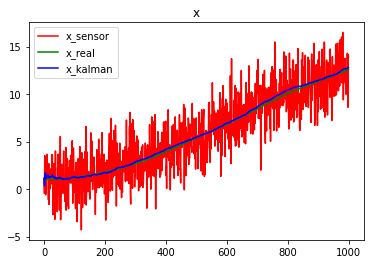

In [ ]:
plt.plot(x_sensor, "r", label="x_sensor")
plt.plot(x_real, "g", label="x_real")
plt.plot(x_kalman, "b", label="x_kalman")
plt.title("x")
plt.legend()

Text(0, 0.5, 'x')

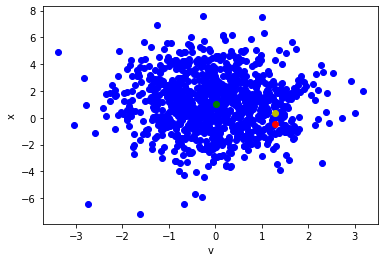

In [ ]:
# 1 position
POSITION = 1
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='b')
plt.scatter(v_real[POSITION], x_real[POSITION], c='g')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='r')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

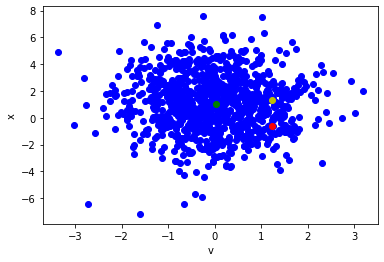

In [ ]:
# 5 position
POSITION = 5
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='b')
plt.scatter(v_real[POSITION], x_real[POSITION], c='g')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='r')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

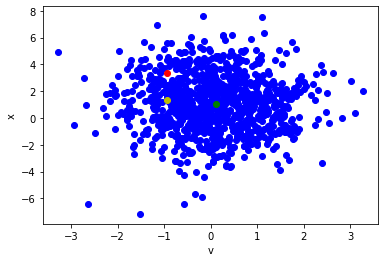

In [ ]:
# 25 position
v_position_25 = v_noise_for_position + v_real[25] 
x_position_25 = x_noise_for_position + x_real[25] 
plt.scatter(v_position_25, x_position_25, c='b')
plt.scatter(v_real[25], x_real[25], c='g')
plt.scatter(v_sensor[25], x_sensor[25], c='r')
plt.scatter(v_sensor[25], x_kalman[25], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

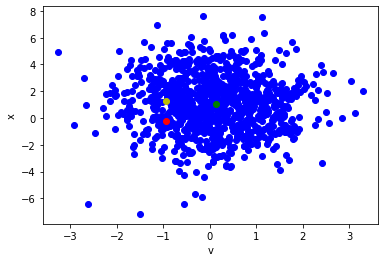

In [ ]:
# 30 position
POSITION = 30
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='b')
plt.scatter(v_real[POSITION], x_real[POSITION], c='g')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='r')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

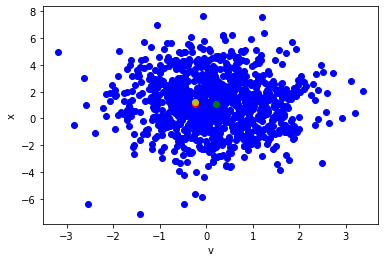

In [ ]:
# 49 position
POSITION = 49
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='b')
plt.scatter(v_real[POSITION], x_real[POSITION], c='g')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='r')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

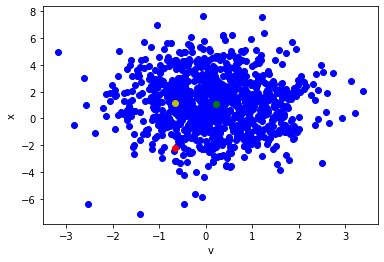

In [ ]:
# 50 position
POSITION = 50
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='b')
plt.scatter(v_real[POSITION], x_real[POSITION], c='g')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='r')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

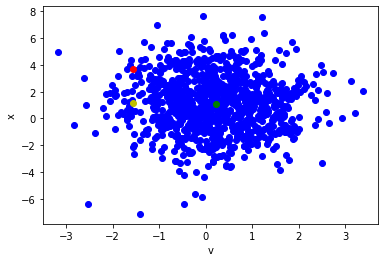

In [ ]:
# 51 position
POSITION = 51
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='b')
plt.scatter(v_real[POSITION], x_real[POSITION], c='g')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='r')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='y')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

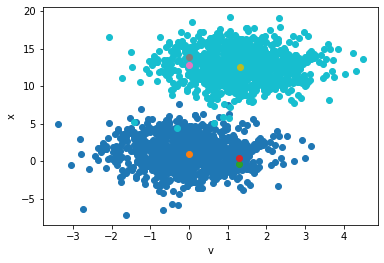

In [ ]:
# 51 position
POSITION = 1
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x")

POSITION = 999
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C9')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C8')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C7')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C6')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

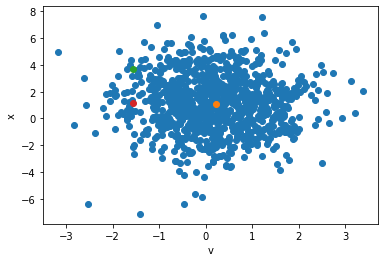

In [ ]:
#https://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

# 51 position
POSITION = 51
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x") 

Text(0, 0.5, 'x')

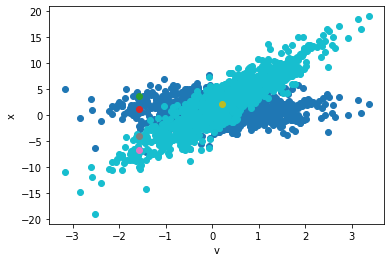

In [ ]:
POSITION = 51
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x") 

# 51 position after 5 s
TIME_DELTA = 5
old_position = np.array([x_position, v_position])
F = np.array([[1, TIME_DELTA], [0, 1]])
new_position = np.dot(F, old_position)

plt.scatter(new_position[1], new_position[0], c='C9')
plt.scatter(v_real[POSITION], x_real[POSITION] + TIME_DELTA * v_real[POSITION], c='C8')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C7')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C6')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

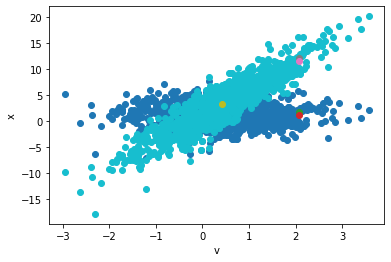

In [ ]:
POSITION = 101
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x") 

# 101 position after 5 s
TIME_DELTA = 5
old_position = np.array([x_position, v_position])
F = np.array([[1, TIME_DELTA], [0, 1]])
new_position = np.dot(F, old_position)

plt.scatter(new_position[1], new_position[0], c='C9')
plt.scatter(v_real[POSITION], x_real[POSITION] + TIME_DELTA * v_real[POSITION], c='C8')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C7')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C6')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

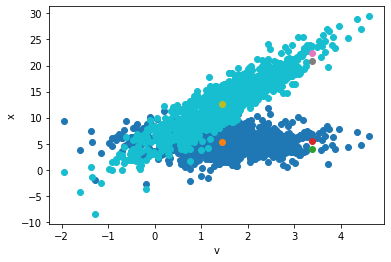

In [ ]:
POSITION = 501
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x") 

# 501 position after 5 s
TIME_DELTA = 5
old_position = np.array([x_position, v_position])
F = np.array([[1, TIME_DELTA], [0, 1]])
new_position = np.dot(F, old_position)

plt.scatter(new_position[1], new_position[0], c='C9')
plt.scatter(v_real[POSITION], x_real[POSITION] + TIME_DELTA * v_real[POSITION], c='C8')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C7')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C6')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

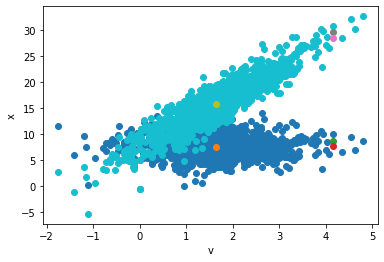

In [ ]:
POSITION = 650
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x") 

# 501 position after 5 s
TIME_DELTA = 5
old_position = np.array([x_position, v_position])
F = np.array([[1, TIME_DELTA], [0, 1]])
new_position = np.dot(F, old_position)

plt.scatter(new_position[1], new_position[0], c='C9')
plt.scatter(v_real[POSITION], x_real[POSITION] + TIME_DELTA * v_real[POSITION], c='C8')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C7')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C6')
plt.xlabel("v")
plt.ylabel("x")

Text(0, 0.5, 'x')

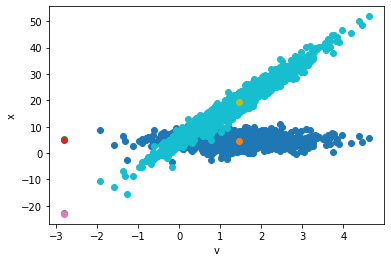

In [ ]:
POSITION = 450
v_position = v_noise_for_position + v_real[POSITION] 
x_position = x_noise_for_position + x_real[POSITION] 
plt.scatter(v_position, x_position, c='C0')
plt.scatter(v_real[POSITION], x_real[POSITION], c='C1')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION], c='C2')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION], c='C3')
plt.xlabel("v")
plt.ylabel("x") 

# 501 position after 5 s
TIME_DELTA = 10
old_position = np.array([x_position, v_position])
F = np.array([[1, TIME_DELTA], [0, 1]])
new_position = np.dot(F, old_position)

plt.scatter(new_position[1], new_position[0], c='C9')
plt.scatter(v_real[POSITION], x_real[POSITION] + TIME_DELTA * v_real[POSITION], c='C8')
plt.scatter(v_sensor[POSITION], x_sensor[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C7')
plt.scatter(v_sensor[POSITION], x_kalman[POSITION] + TIME_DELTA * v_sensor[POSITION], c='C6')
plt.xlabel("v")
plt.ylabel("x")